In [1]:
%config IPCompleter.greedy=True

import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
classes = {
    1: 'normal',
    2: 'hyperthyroidism',
    3: 'hypothyroidism'
}

attributes = [
    'age',
    'sex',
    'on_thyroxine',
    'query_on_thyroxine',
    'on_antithyroid_medication',
    'sick',
    'pregnant',
    'thyroid_surgery',
    'I131_treatment',
    'query_hypothyroid',
    'query_hyperthyroid',
    'lithium',
    'goitre',
    'tumor',
    'hypopituitary',
    'psych',
    'TSH',
    'T3',
    'TT4',
    'T4U',
    'FTI'
]

In [3]:
train_data = []
train_data_labels = []

with open('data/ann-train.data') as data_file:
    train_data = pandas.read_csv(data_file, delimiter=' ', header=None)

train_data = train_data.drop(labels=[22,23], axis='columns')

train_data.columns = attributes + ['class']

train_data_labels = train_data['class']

train_data = train_data.drop('class', axis='columns')

In [4]:
anova_filter = SelectKBest(f_classif, k='all')

anova_filter.fit(train_data, train_data_labels)

attribute_score = [ (name, score) for name, score in zip(train_data.columns, numpy.around(anova_filter.scores_, 2)) ]

attribute_score.sort(key=lambda x: x[1], reverse=True)

print(*('{}: {}'.format(name, score) for name, score in attribute_score), sep='\n')

TSH: 1148.28
FTI: 340.53
TT4: 290.46
T3: 119.54
on_thyroxine: 14.73
query_hypothyroid: 13.97
sex: 4.43
T4U: 2.93
sick: 2.81
psych: 2.64
pregnant: 2.19
thyroid_surgery: 1.6
goitre: 1.36
on_antithyroid_medication: 0.92
query_hyperthyroid: 0.71
query_on_thyroxine: 0.67
age: 0.57
lithium: 0.24
tumor: 0.18
I131_treatment: 0.13
hypopituitary: 0.04


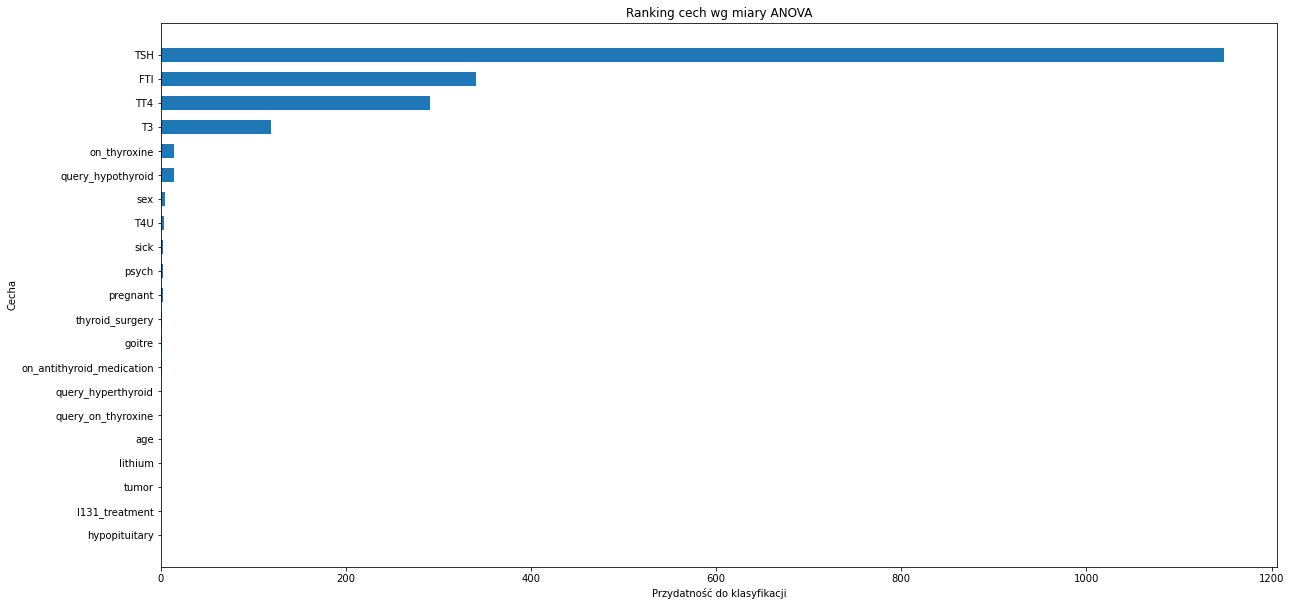

In [5]:
plt.figure(figsize=(20,10))

y_pos = numpy.arange(len(attributes))
plt.barh(y_pos, [ score[1] for score in attribute_score ], height=0.6)
plt.yticks(y_pos, [ score[0] for score in attribute_score ])
plt.gca().invert_yaxis()
plt.title('Ranking cech wg miary ANOVA')
plt.xlabel('Przydatność do klasyfikacji')
plt.ylabel('Cecha')
plt.show()

In [216]:
from sklearn import tree
from sklearn import clone
from sklearn.model_selection import cross_val_score

#test data do badania (mozna wyrzucic lub dać gdzie indziej)
with open('data/ann-test.data') as data_file:
    test_data = pandas.read_csv(data_file, delimiter=' ', header=None)
test_data = test_data.drop(labels=[22,23], axis='columns')
test_data.columns = attributes + ['class']
test_data_labels = test_data['class']
test_data = test_data.drop('class', axis='columns')


#Drzewo decyzyjne cart – 2 różne kryteria podziału oraz 3 wartościmaksymalnej głębokości drzewa.
models = {
    'random3' : tree.DecisionTreeClassifier(max_depth=3, splitter='random'),
    'random6' : tree.DecisionTreeClassifier(max_depth=6, splitter='random'),
    'random12' : tree.DecisionTreeClassifier(max_depth=12, splitter='random'),
    'best3' : tree.DecisionTreeClassifier(max_depth=3, splitter='best'),
    'best6' : tree.DecisionTreeClassifier(max_depth=6, splitter='best'),
    'best12' : tree.DecisionTreeClassifier(max_depth=12, splitter='best'),
}

X = train_data.append(test_data)
y = train_data_labels.append(test_data_labels)

results = {
    'random3' : [],
    'random6' : [],
    'random12' : [],
    'best3' : [],
    'best6' : [],
    'best12' : [],
}

#dla roznych liczb cech od 1 do 6 cech przeprowadzamy badanie
for iteration in range (0,6):
    feature_count = iteration + 1
    data = SelectKBest(f_classif, k=feature_count)
    data.fit(train_data, train_data_labels)
    #dla kazdych parametrow drzewa
    for model_name, model_type in models.items():
        test = clone(model_type)
        
        scores = numpy.array([])
        
        #5 razy powtórzona 2-krotna walidacja
        for repetition in range(0,5):
            scores = numpy.append(scores, cross_val_score(test, X, y, cv=2))
        
        results[model_name].append((numpy.mean(scores), numpy.std(scores), len(scores)))
                                

random3 0 3
random6 0 6
random12 0 12
best3 0 3
best6 0 6
best12 0 8
random3 1 3
random6 1 6
random12 1 12
best3 1 3
best6 1 6
best12 1 8
random3 2 3
random6 2 6
random12 2 12
best3 2 3
best6 2 6
best12 2 8
random3 3 3
random6 3 6
random12 3 12
best3 3 3
best6 3 6
best12 3 8
random3 4 3
random6 4 6
random12 4 12
best3 4 3
best6 4 6
best12 4 8
random3 5 3
random6 5 6
random12 5 12
best3 5 3
best6 5 6
best12 5 8


In [207]:
#średnie wyniki zaokrąglone do 4 miejsc po przecinku
for model_name in results.keys():
    print(model_name, [round(stat[0],4) for stat in results[model_name]])

random3 [0.9404, 0.9425, 0.9414, 0.9346, 0.9411, 0.9398]
random6 [0.9522, 0.9587, 0.9648, 0.9596, 0.9594, 0.9694]
random12 [0.9842, 0.9848, 0.9796, 0.9804, 0.9815, 0.9852]
best3 [0.9907, 0.9907, 0.9907, 0.9907, 0.9907, 0.9907]
best6 [0.9936, 0.9937, 0.9936, 0.9936, 0.9934, 0.9936]
best12 [0.9934, 0.9934, 0.9933, 0.9933, 0.9933, 0.9933]


In [208]:
from scipy import stats

#analiza statystyczna - test parowy t-Studenta

ttest_results = {}

for model_name_1 in results.keys():
    #znalezienie liczby cech, która dała maksymalny średni wynik
    feature_count_1 = numpy.argmax(results[model_name_1], 0)[0]
    #pobranie statystyk dla tej liczby cech
    mean1, std1, nobs1 = results[model_name_1][feature_count_1]
    
    #dla wyników pozostałych klasyfikatorów
    for model_name_2 in results.keys():
        if (model_name_1 != model_name_2):
            feature_count_2 = numpy.argmax(results[model_name_2], 0)[0] #j.w.
            mean2, std2, nobs2 = results[model_name_2][feature_count_2] #j.w.
            
            key = "{}_{}|{}_{}".format(model_name_1, feature_count_1, model_name_2, feature_count_2)
            #test t-studenta dla danych statystyk
            ttest_results[key] = tuple(stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2))

In [214]:
#wyniki testów t-Studenta dla par klasyfikatorów zaokrąglone do 4 miejsc po przecinku
for ttest_key, ttest_result in ttest_results.items():
    print("{}: {:0.4f}, {:0.4f}".format(ttest_key, round(ttest_result[0], 4), round(ttest_result[1], 4)))

random3_1|random6_5: -5.9522, 0.0000
random3_1|random12_5: -15.9633, 0.0000
random3_1|best3_0: -18.3554, 0.0000
random3_1|best6_1: -20.3296, 0.0000
random3_1|best12_0: -20.2612, 0.0000
random6_5|random3_1: 5.9522, 0.0000
random6_5|random12_5: -4.0400, 0.0008
random6_5|best3_0: -5.5033, 0.0000
random6_5|best6_1: -6.3928, 0.0000
random6_5|best12_0: -6.3254, 0.0000
random12_5|random3_1: 15.9633, 0.0000
random12_5|random6_5: 4.0400, 0.0008
random12_5|best3_0: -4.3130, 0.0004
random12_5|best6_1: -8.1665, 0.0000
random12_5|best12_0: -7.9971, 0.0000
best3_0|random3_1: 18.3554, 0.0000
best3_0|random6_5: 5.5033, 0.0000
best3_0|random12_5: 4.3130, 0.0004
best3_0|best6_1: -3.2558, 0.0044
best3_0|best12_0: -2.9991, 0.0077
best6_1|random3_1: 20.3296, 0.0000
best6_1|random6_5: 6.3928, 0.0000
best6_1|random12_5: 8.1665, 0.0000
best6_1|best3_0: 3.2558, 0.0044
best6_1|best12_0: 0.5580, 0.5837
best12_0|random3_1: 20.2612, 0.0000
best12_0|random6_5: 6.3254, 0.0000
best12_0|random12_5: 7.9971, 0.0000
best